In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
order_report=pd.read_excel("C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Company X - Order Report.xlsx")
pincode_zone=pd.read_excel('C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Company X - Pincode Zones.xlsx')
SKU_master=pd.read_excel('C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Company X - SKU Master.xlsx')
courier_invoice=pd.read_excel('C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Courier Company - Invoice.xlsx')
rates=pd.read_excel('C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Courier Company - Rates.xlsx')
expected_result=pd.read_excel('C:\\Users\\Ananya Nayak\\Desktop\\Data Analytics\\My Projects\\E-commerce\\Final Assignment Data\\Expected_Result.xlsx')

In [4]:
order_report.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [5]:
order_report.shape

(400, 3)

In [6]:
pincode_zone.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [7]:
pincode_zone.shape

(124, 3)

In [8]:
SKU_master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [9]:
SKU_master.shape

(66, 2)

In [10]:
courier_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [11]:
courier_invoice.shape

(124, 8)

In [12]:
rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


In [13]:
expected_result

,Unnamed: 0,Count,Amount
0,Total Orders - Correctly Charged,1.0,135.0
1,Total Orders - Over Charged,1.0,-141.5
2,Total Orders - Under Charged,NaN,NaN


In [14]:
order_report_with_sku = pd.merge(order_report, SKU_master, how='left', left_on='SKU', right_on='SKU')

In [15]:
order_report_with_sku.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


In [16]:
order_report_with_sku.shape

(401, 4)

In [17]:
print(order_report_with_sku.isnull().sum())

ExternOrderNo    0
SKU              0
Order Qty        0
Weight (g)       0
dtype: int64


In [18]:
combined_data = pd.merge(pincode_zone, courier_invoice, 
                         on=['Warehouse Pincode', 'Customer Pincode'], 
                         how='inner')

In [19]:
combined_data.head()

,Warehouse Pincode,Customer Pincode,Zone_x,AWB Code,Order ID,Charged Weight,Zone_y,Type of Shipment,Billing Amount (Rs.)
0,121003,507101,d,1091117222124,2001806232,1.30,d,Forward charges,135.0
1,121003,486886,d,1091117222194,2001806273,1.00,d,Forward charges,90.2
2,121003,532484,d,1091117222931,2001806408,2.50,d,Forward charges,224.6
3,121003,143001,b,1091117223244,2001806458,1.00,b,Forward charges,61.3
4,121003,515591,d,1091117229345,2001807012,0.15,d,Forward charges,45.4


In [20]:
# Creating a new column to indicate whether the zones match or not
combined_data['Zone Match'] = (combined_data['Zone_x'] == combined_data['Zone_y']).astype(int)

In [21]:
combined_data.head()

,Warehouse Pincode,Customer Pincode,Zone_x,AWB Code,Order ID,Charged Weight,Zone_y,Type of Shipment,Billing Amount (Rs.),Zone Match
0,121003,507101,d,1091117222124,2001806232,1.30,d,Forward charges,135.0,1
1,121003,486886,d,1091117222194,2001806273,1.00,d,Forward charges,90.2,1
2,121003,532484,d,1091117222931,2001806408,2.50,d,Forward charges,224.6,1
3,121003,143001,b,1091117223244,2001806458,1.00,b,Forward charges,61.3,1
4,121003,515591,d,1091117229345,2001807012,0.15,d,Forward charges,45.4,1


In [25]:
combined_data.to_csv('C:/Users/Ananya Nayak/Desktop/Data Analytics/My Projects/E-commerce/combined_data.csv', index=False)

In [26]:
zone_match_counts = combined_data['Zone Match'].value_counts()

print("Number of matches:", zone_match_counts[1])
print("Number of mismatches:", zone_match_counts[0])

matching_percentage = (combined_data['Zone Match'].sum() / len(combined_data)) * 100

print(f"Percentage of orders where the zones match: {matching_percentage:.2f}%")

Number of matches: 63
Number of mismatches: 111
Percentage of orders where the zones match: 36.21%


In [23]:
# combined_data.tail()

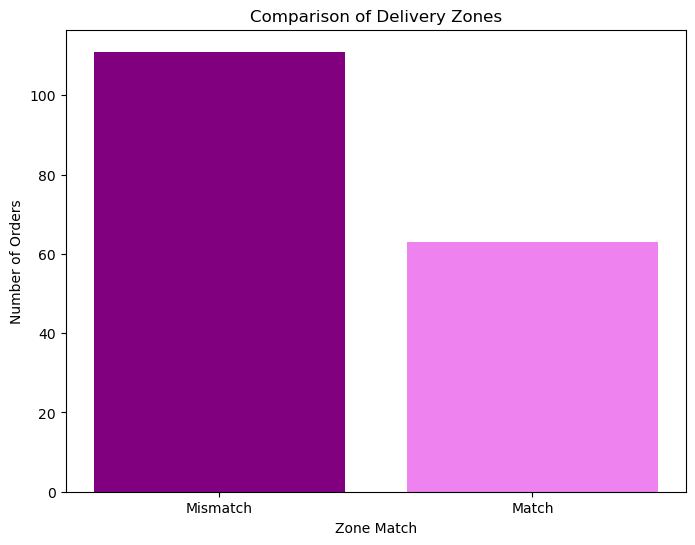

In [24]:
# Creating a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(zone_match_counts.index, zone_match_counts.values, color=['purple', 'violet'])
plt.xlabel('Zone Match')
plt.ylabel('Number of Orders')
plt.title('Comparison of Delivery Zones')

# Customize the x-axis labels
plt.xticks([0, 1], ['Mismatch', 'Match'])

# Show plot
plt.show()

In [24]:
order_report_with_sku['Total Weight'] = order_report_with_sku['Weight (g)'] * order_report_with_sku['Order Qty']

In [25]:
order_report_with_sku.head()

,ExternOrderNo,SKU,Order Qty,Weight (g),Total Weight
0,2001827036,8904223818706,1.0,127,127.0
1,2001827036,8904223819093,1.0,150,150.0
2,2001827036,8904223819109,1.0,100,100.0
3,2001827036,8904223818430,1.0,165,165.0
4,2001827036,8904223819277,1.0,350,350.0


In [26]:
order_report_with_sku.shape

(401, 5)

In [27]:
merged_data = pd.merge(order_report_with_sku, courier_invoice, left_on='ExternOrderNo', right_on='Order ID', how='inner')

In [28]:
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g),Total Weight,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,2001827036,8904223818706,1.0,127,127.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
1,2001827036,8904223819093,1.0,150,150.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
2,2001827036,8904223819109,1.0,100,100.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
3,2001827036,8904223818430,1.0,165,165.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
4,2001827036,8904223819277,1.0,350,350.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9


In [29]:
merged_data.shape

(401, 13)

In [30]:
merged_data['Order ID'] = merged_data['Order ID'].fillna(merged_data['ExternOrderNo'])

# Drop the redundant column ExternOrderNo
merged_data.drop(columns=['ExternOrderNo'], inplace=True)

In [31]:
merged_data.head()

,SKU,Order Qty,Weight (g),Total Weight,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,8904223818706,1.0,127,127.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
1,8904223819093,1.0,150,150.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
2,8904223819109,1.0,100,100.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
3,8904223818430,1.0,165,165.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9
4,8904223819277,1.0,350,350.0,1091122418320,2001827036,1.6,121003,173213,b,Forward charges,117.9


In [32]:
merged_data.shape

(401, 12)

In [33]:
rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


In [34]:
merged_data['Zone'] = merged_data['Zone'].str.upper()

In [35]:
merged_data.head()

,SKU,Order Qty,Weight (g),Total Weight,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,8904223818706,1.0,127,127.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9
1,8904223819093,1.0,150,150.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9
2,8904223819109,1.0,100,100.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9
3,8904223818430,1.0,165,165.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9
4,8904223819277,1.0,350,350.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9


In [36]:
def get_applicable_weight(row):
    zone = row['Zone']
    total_weight = row['Total Weight']
    weight_slab = rates[rates['Zone'] == zone]['Weight Slabs'].iloc[0]
    if total_weight > weight_slab:
        return weight_slab
    else:
        return total_weight

merged_data['Applicable Weight'] = merged_data.apply(get_applicable_weight, axis=1)

In [37]:
merged_data

,SKU,Order Qty,Weight (g),Total Weight,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Applicable Weight
0,8904223818706,1.0,127,127.0,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0
1,8904223819093,1.0,150,150.0,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0
2,8904223819109,1.0,100,100.0,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0
3,8904223818430,1.0,165,165.0,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0
4,8904223819277,1.0,350,350.0,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,8904223818942,1.0,133,133.0,1091117222080,2001806229,0.71,121003,421204,D,Forward charges,90.2,1.5
397,8904223818850,1.0,240,240.0,1091117222080,2001806229,0.71,121003,421204,D,Forward charges,90.2,1.5
398,8904223818850,2.0,240,480.0,1091117222065,2001806226,0.68,121003,723146,D,Forward charges,90.2,1.5
399,8904223816214,1.0,120,120.0,1091117221940,2001806210,2.92,121003,140604,B,Forward charges,174.5,1.0


In [38]:
def calculate_charges(row):
    zone = row['Zone']
    total_weight = row['Total Weight']
    weight_slab = rates[rates['Zone'] == zone]['Weight Slabs'].iloc[0]
    fixed_charge = rates[rates['Zone'] == zone]['Forward Fixed Charge'].iloc[0]
    additional_charge = rates[rates['Zone'] == zone]['Forward Additional Weight Slab Charge'].iloc[0]
    
    # Calculating charges
    if total_weight <= weight_slab:
        charges = fixed_charge
    else:
        additional_slabs = (total_weight - weight_slab) / weight_slab
        total_additional_charge = additional_slabs * additional_charge
        charges = fixed_charge + total_additional_charge
    
    return charges

merged_data['Charges'] = merged_data.apply(calculate_charges, axis=1)


In [39]:
merged_data.head()

,SKU,Order Qty,Weight (g),Total Weight,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Applicable Weight,Charges
0,8904223818706,1.0,127,127.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,3598.8
1,8904223819093,1.0,150,150.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4249.7
2,8904223819109,1.0,100,100.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,2834.7
3,8904223818430,1.0,165,165.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4674.2
4,8904223819277,1.0,350,350.0,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,9909.7


In [40]:
# Converting grams to kilograms and renaming the column
merged_data['Total weight as per X (KG)'] = merged_data['Total Weight'] / 1000
merged_data.drop(columns=['Total Weight'], inplace=True)

In [41]:
merged_data

,SKU,Order Qty,Weight (g),AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Applicable Weight,Charges,Total weight as per X (KG)
0,8904223818706,1.0,127,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0,3598.800000,0.127
1,8904223819093,1.0,150,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0,4249.700000,0.150
2,8904223819109,1.0,100,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0,2834.700000,0.100
3,8904223818430,1.0,165,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0,4674.200000,0.165
4,8904223819277,1.0,350,1091122418320,2001827036,1.60,121003,173213,B,Forward charges,117.9,1.0,9909.700000,0.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,8904223818942,1.0,133,1091117222080,2001806229,0.71,121003,421204,D,Forward charges,90.2,1.5,3972.866667,0.133
397,8904223818850,1.0,240,1091117222080,2001806229,0.71,121003,421204,D,Forward charges,90.2,1.5,7168.600000,0.240
398,8904223818850,2.0,240,1091117222065,2001806226,0.68,121003,723146,D,Forward charges,90.2,1.5,14336.600000,0.480
399,8904223816214,1.0,120,1091117221940,2001806210,2.92,121003,140604,B,Forward charges,174.5,1.0,3400.700000,0.120


In [42]:
# Calculating Weight slab as per X (KG)
def calculate_weight_slab_x(row):
    zone = row['Zone']
    total_weight = row['Total weight as per X (KG)']
    weight_slab = rates.loc[rates['Zone'] == zone, 'Weight Slabs'].iloc[0]
    return weight_slab

merged_data['Weight slab as per X (KG)'] = merged_data.apply(calculate_weight_slab_x, axis=1)

def calculate_weight_slab_charged(row):
    zone = row['Zone']
    charged_weight = row['Charged Weight']
    weight_slab = rates.loc[rates['Zone'] == zone, 'Weight Slabs'].iloc[0]
    return min(charged_weight, weight_slab)

merged_data['Weight slab charged by Courier Company (KG)'] = merged_data.apply(calculate_weight_slab_charged, axis=1)

In [43]:
merged_data.head()

,SKU,Order Qty,Weight (g),AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Applicable Weight,Charges,Total weight as per X (KG),Weight slab as per X (KG),Weight slab charged by Courier Company (KG)
0,8904223818706,1.0,127,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,3598.8,0.127,1.0,1.0
1,8904223819093,1.0,150,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4249.7,0.150,1.0,1.0
2,8904223819109,1.0,100,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,2834.7,0.100,1.0,1.0
3,8904223818430,1.0,165,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4674.2,0.165,1.0,1.0
4,8904223819277,1.0,350,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,9909.7,0.350,1.0,1.0


In [44]:
combined_data

,Warehouse Pincode,Customer Pincode,Zone_x,AWB Code,Order ID,Charged Weight,Zone_y,Type of Shipment,Billing Amount (Rs.),Zone Match
0,121003,507101,d,1091117222124,2001806232,1.30,d,Forward charges,135.0,1
1,121003,486886,d,1091117222194,2001806273,1.00,d,Forward charges,90.2,1
2,121003,532484,d,1091117222931,2001806408,2.50,d,Forward charges,224.6,1
3,121003,143001,b,1091117223244,2001806458,1.00,b,Forward charges,61.3,1
4,121003,515591,d,1091117229345,2001807012,0.15,d,Forward charges,45.4,1
...,...,...,...,...,...,...,...,...,...,...
169,121003,302020,b,1091117904860,2001811039,0.68,d,Forward charges,90.2,0
170,121003,302020,b,1091121846136,2001811305,0.50,d,Forward charges,45.4,0
171,121003,325207,b,1091118551656,2001812941,0.73,d,Forward charges,90.2,0
172,121003,303702,b,1091117614452,2001809383,0.50,d,Forward and RTO charges,86.7,0


In [45]:
combined_data_duplicates = combined_data[combined_data.duplicated(subset='Order ID', keep=False)]
combined_data_unique = combined_data.drop_duplicates(subset='Order ID')
final_merged_df = pd.merge(merged_data, combined_data_unique, on='Order ID', how='left')
final_merged_df.head()

,SKU,Order Qty,Weight (g),AWB Code_x,Order ID,Charged Weight_x,Warehouse Pincode_x,Customer Pincode_x,Zone,Type of Shipment_x,...,Weight slab charged by Courier Company (KG),Warehouse Pincode_y,Customer Pincode_y,Zone_x,AWB Code_y,Charged Weight_y,Zone_y,Type of Shipment_y,Billing Amount (Rs.)_y,Zone Match
0,8904223818706,1.0,127,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,...,1.0,121003,173213,e,1091122418320,1.6,b,Forward charges,117.9,0
1,8904223819093,1.0,150,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,...,1.0,121003,173213,e,1091122418320,1.6,b,Forward charges,117.9,0
2,8904223819109,1.0,100,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,...,1.0,121003,173213,e,1091122418320,1.6,b,Forward charges,117.9,0
3,8904223818430,1.0,165,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,...,1.0,121003,173213,e,1091122418320,1.6,b,Forward charges,117.9,0
4,8904223819277,1.0,350,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,...,1.0,121003,173213,e,1091122418320,1.6,b,Forward charges,117.9,0


In [46]:
merged_data['Delivery Zone as per X']= final_merged_df['Zone_x'].copy()

In [47]:
merged_data['Delivery Zone charged by Courier Company']=final_merged_df['Zone_y'].copy()

In [48]:
def calculate_expected_charge(row):
    zone = row['Zone']
    total_weight = row['Charged Weight'] if not pd.isna(row['Charged Weight']) else row['Total weight as per X (KG)']
    weight_slabs_str = str(rates[rates['Zone'] == zone]['Weight Slabs'].values[0])  # Convert to string to ensure split works
    weight_slabs = [float(slab) for slab in weight_slabs_str.split(",")]
    fixed_charge = float(rates[rates['Zone'] == zone]['Forward Fixed Charge'])
    additional_charge = float(rates[rates['Zone'] == zone]['Forward Additional Weight Slab Charge'])
    
    # Calculate charges
    if total_weight <= weight_slabs[0]:
        charges = fixed_charge
    else:
        additional_slabs = (total_weight - weight_slabs[0]) / weight_slabs[0]
        total_additional_charge = additional_slabs * additional_charge
        charges = fixed_charge + total_additional_charge
    
    return charges

In [49]:
merged_data['Expected Charge as per X (Rs.)'] = merged_data.apply(calculate_expected_charge, axis=1)

# Calculating the difference between expected and billed charges
merged_data['Difference Between Expected Charges and Billed Charges (Rs.)'] = merged_data['Expected Charge as per X (Rs.)'] - merged_data['Billing Amount (Rs.)']


In [50]:
merged_data.head()

,SKU,Order Qty,Weight (g),AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Applicable Weight,Charges,Total weight as per X (KG),Weight slab as per X (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,8904223818706,1.0,127,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,3598.8,0.127,1.0,1.0,e,b,49.98,-67.92
1,8904223819093,1.0,150,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4249.7,0.150,1.0,1.0,e,b,49.98,-67.92
2,8904223819109,1.0,100,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,2834.7,0.100,1.0,1.0,e,b,49.98,-67.92
3,8904223818430,1.0,165,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,4674.2,0.165,1.0,1.0,e,b,49.98,-67.92
4,8904223819277,1.0,350,1091122418320,2001827036,1.6,121003,173213,B,Forward charges,117.9,1.0,9909.7,0.350,1.0,1.0,e,b,49.98,-67.92


In [51]:
# Creating resultant DataFrame
resultant_df = merged_data[['Order ID', 'AWB Code', 'Total weight as per X (KG)', 'Weight slab as per X (KG)', 
                   'Charged Weight', 'Applicable Weight', 'Delivery Zone as per X', 'Delivery Zone charged by Courier Company', 
                   'Expected Charge as per X (Rs.)', 'Billing Amount (Rs.)']]

# Rename columns
resultant_df.columns = ['OrderID', 'AWB Number', 'Total weight as per X (KG)', 'Weight slab as per X (KG)', 
                        'Total weight as per Courier Company (KG)', 'Weight slab charged by Courier Company (KG)', 
                        'Delivery Zone as per X', 'Delivery Zone charged by Courier Company', 
                        'Expected Charge as per X (Rs.)', 'Charges Billed by Courier Company (Rs.)']

# Calculating Difference Between Expected Charges and Billed Charges
resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] = resultant_df['Expected Charge as per X (Rs.)'] - resultant_df['Charges Billed by Courier Company (Rs.)']


In [52]:
resultant_df.head()

,OrderID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,1091122418320,0.127,1.0,1.6,1.0,e,b,49.98,117.9,-67.92
1,2001827036,1091122418320,0.150,1.0,1.6,1.0,e,b,49.98,117.9,-67.92
2,2001827036,1091122418320,0.100,1.0,1.6,1.0,e,b,49.98,117.9,-67.92
3,2001827036,1091122418320,0.165,1.0,1.6,1.0,e,b,49.98,117.9,-67.92
4,2001827036,1091122418320,0.350,1.0,1.6,1.0,e,b,49.98,117.9,-67.92


In [53]:
# Total orders where X has been correctly charged
correctly_charged_count = len(resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0])
correctly_charged_amount = resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0]['Charges Billed by Courier Company (Rs.)'].sum()

# Total orders where X has been overcharged
overcharged_count = len(resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] < 0])
overcharged_amount = abs(resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] < 0]['Difference Between Expected Charges and Billed Charges (Rs.)'].sum())

# Total orders where X has been undercharged
undercharged_count = len(resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] > 0])
undercharged_amount = resultant_df[resultant_df['Difference Between Expected Charges and Billed Charges (Rs.)'] > 0]['Difference Between Expected Charges and Billed Charges (Rs.)'].sum()

In [54]:
# Creating the summary table
summary_table = pd.DataFrame({
    'Category': [
        'Total orders where X has been correctly charged',
        'Total Orders where X has been overcharged',
        'Total Orders where X has been undercharged'
    ],
    'Count': [correctly_charged_count, overcharged_count, undercharged_count],
    'Amount (Rs.)': [correctly_charged_amount, overcharged_amount, undercharged_amount]
})

summary_table

,Category,Count,Amount (Rs.)
0,Total orders where X has been correctly charged,41,1737.400
1,Total Orders where X has been overcharged,360,29882.734
2,Total Orders where X has been undercharged,0,0.000
